## Trial of Time Series Analysis by Tensorflow Probability - Autoregressive Model - Continued - State Space Models

#### Based on https://bayesiancomputationbook.com/markdown/chp_06.html#state-space-models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az

In [15]:
tfd = tfp.distributions

In [3]:
theta0, theta1 = 1.2, 2.6

In [4]:
sigma = 0.4

In [5]:
num_timesteps = 100

In [7]:
tf.linspace(0., 1., num_timesteps).shape

TensorShape([100])

In [11]:
tf.linspace(0., 1., num_timesteps)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151516, 0.16161616, 0.17171717, 0.18181819, 0.1919192 ,
       0.2020202 , 0.21212122, 0.22222222, 0.23232323, 0.24242425,
       0.25252524, 0.26262626, 0.27272728, 0.28282827, 0.2929293 ,
       0.3030303 , 0.3131313 , 0.32323232, 0.33333334, 0.34343433,
       0.35353535, 0.36363637, 0.37373737, 0.3838384 , 0.3939394 ,
       0.4040404 , 0.41414142, 0.42424244, 0.43434343, 0.44444445,
       0.45454547, 0.46464646, 0.47474748, 0.4848485 , 0.4949495 ,
       0.5050505 , 0.5151515 , 0.5252525 , 0.53535354, 0.54545456,
       0.5555556 , 0.56565654, 0.57575756, 0.5858586 , 0.5959596 ,
       0.6060606 , 0.61616164, 0.6262626 , 0.6363636 , 0.64646465,
       0.65656567, 0.6666667 , 0.67676765, 0.68686867, 0.6969697 ,
       0.70707

In [8]:
time_stamp = tf.linspace(0., 1., num_timesteps)[..., None]

In [9]:
time_stamp.shape

TensorShape([100, 1])

In [10]:
time_stamp

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.        ],
       [0.01010101],
       [0.02020202],
       [0.03030303],
       [0.04040404],
       [0.05050505],
       [0.06060606],
       [0.07070707],
       [0.08080808],
       [0.09090909],
       [0.1010101 ],
       [0.11111111],
       [0.12121212],
       [0.13131313],
       [0.14141414],
       [0.15151516],
       [0.16161616],
       [0.17171717],
       [0.18181819],
       [0.1919192 ],
       [0.2020202 ],
       [0.21212122],
       [0.22222222],
       [0.23232323],
       [0.24242425],
       [0.25252524],
       [0.26262626],
       [0.27272728],
       [0.28282827],
       [0.2929293 ],
       [0.3030303 ],
       [0.3131313 ],
       [0.32323232],
       [0.33333334],
       [0.34343433],
       [0.35353535],
       [0.36363637],
       [0.37373737],
       [0.3838384 ],
       [0.3939394 ],
       [0.4040404 ],
       [0.41414142],
       [0.42424244],
       [0.43434343],
       [0.44444445],
     

In [12]:
yhat = theta0 + theta1 * time_stamp

In [13]:
yhat

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[1.2      ],
       [1.2262627],
       [1.2525253],
       [1.278788 ],
       [1.3050506],
       [1.3313131],
       [1.3575758],
       [1.3838384],
       [1.410101 ],
       [1.4363637],
       [1.4626263],
       [1.488889 ],
       [1.5151515],
       [1.5414141],
       [1.5676768],
       [1.5939394],
       [1.6202021],
       [1.6464647],
       [1.6727273],
       [1.6989899],
       [1.7252526],
       [1.7515152],
       [1.7777778],
       [1.8040404],
       [1.8303031],
       [1.8565657],
       [1.8828282],
       [1.909091 ],
       [1.9353535],
       [1.9616162],
       [1.9878788],
       [2.0141413],
       [2.040404 ],
       [2.0666666],
       [2.0929294],
       [2.119192 ],
       [2.1454546],
       [2.1717172],
       [2.19798  ],
       [2.2242424],
       [2.250505 ],
       [2.2767677],
       [2.3030305],
       [2.3292928],
       [2.3555555],
       [2.3818183],
       [2.4080808],
       [2.

In [16]:
y = tfd.Normal(yhat, sigma).sample()

In [17]:
y

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[1.5035914],
       [0.8862616],
       [1.1096138],
       [1.0214748],
       [1.4066582],
       [1.3683501],
       [0.9162148],
       [1.1910677],
       [1.5114506],
       [1.9295313],
       [0.8386859],
       [1.7227358],
       [1.6301422],
       [1.6153811],
       [1.6024567],
       [1.4652122],
       [1.0361109],
       [1.4040653],
       [1.8549162],
       [1.579879 ],
       [1.1752825],
       [1.7971435],
       [2.4677804],
       [1.4230143],
       [1.7092043],
       [1.6199604],
       [1.4383063],
       [1.9221056],
       [1.9430962],
       [2.2773156],
       [2.3141346],
       [1.8869195],
       [2.9473991],
       [1.7291976],
       [1.8669865],
       [2.1553965],
       [1.7188885],
       [2.1929667],
       [2.562935 ],
       [2.7984772],
       [2.7256618],
       [2.3767488],
       [2.3866086],
       [2.2414534],
       [2.2061722],
       [2.397121 ],
       [2.3815382],
       [2.

In [18]:
# X_0
initial_state_prior = tfd.MultivariateNormalDiag(
    loc=[0., 0.], scale_diag=[5., 5.])

In [20]:
initial_state_prior

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [19]:
# F_t
transition_matrix = lambda _: tf.linalg.LinearOperatorIdentity(2)

In [21]:
# eta_t ~ Normal(0, Q_t)
transition_noise = lambda _: tfd.MultivariateNormalDiag(
loc=[0., 0.], scale_diag=[0., 0.])

In [22]:
# H_t
h = tf.concat([tf.ones_like(time_stamp), time_stamp], axis=-1) 
observation_matrix = lambda t: tf.linalg.LinearOperatorFullMatrix(
[tf.gather(h, t)])

In [23]:
# epsilon_t ~ Normal(0, R_t)
observation_noise = lambda _: tfd.MultivariateNormalDiag(
    loc=[0.], scale_diag=[sigma])

In [24]:
linear_growth_model = tfd.LinearGaussianStateSpaceModel(
    num_timesteps=num_timesteps,
    transition_matrix=transition_matrix,
    transition_noise=transition_noise,
    observation_matrix=observation_matrix,
    observation_noise=observation_noise,
    initial_state_prior=initial_state_prior)

##### Run the Kalman Filter

In [25]:
(
    log_likelihoods,
    mt_filtered, pt_filtered,
    mt_predicted, pt_predicted,
    observation_means, observation_cov # observation_cov is S_t
) = linear_growth_model.forward_filter(y)

In [26]:
log_likelihoods

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-2.5764945 , -0.92601854, -0.22784272, -0.20713992, -0.35989588,
       -0.22464997, -0.37880552, -0.1449673 , -0.4390373 , -1.2368634 ,
       -1.004739  , -0.54203427, -0.22872765, -0.15732685, -0.12580043,
       -0.15804881, -0.9045585 , -0.13345432, -0.41583374, -0.0984985 ,
       -0.5871487 , -0.2452667 , -2.0140831 , -0.41253546, -0.08508036,
       -0.1355954 , -0.37027687, -0.15919968, -0.13509685, -0.6099443 ,
       -0.5070851 , -0.09465377, -2.516268  , -0.5443959 , -0.25327438,
       -0.0599272 , -0.6106038 , -0.06183748, -0.47230738, -0.9196514 ,
       -0.49781874, -0.05181273, -0.05449347, -0.18163323, -0.24704532,
       -0.06551753, -0.08765236, -0.33064488, -1.0385461 , -0.7676546 ,
       -0.63856906, -0.40000176, -0.0842469 , -0.44977203, -0.09511161,
       -0.08259454, -0.45078972, -1.098786  , -0.097014  , -0.86865604,
       -0.3809111 , -0.36864984, -0.46389547, -1.2988749 , -0.05865099,
       -3.047148

In [27]:
mt_filtered

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[ 1.4940296 ,  0.        ],
       [ 1.193518  , -0.47732776],
       [ 1.1699642 , -0.5911421 ],
       [ 1.1417093 , -0.8778455 ],
       [ 1.1851987 , -0.05919176],
       [ 1.2016951 ,  0.5153826 ],
       [ 1.1878893 , -0.5217002 ],
       [ 1.1882105 , -0.3891294 ],
       [ 1.1813897 ,  0.755188  ],
       [ 1.1546334 ,  2.839077  ],
       [ 1.1870282 ,  1.1123856 ],
       [ 1.1608127 ,  2.2026787 ],
       [ 1.146633  ,  2.6935735 ],
       [ 1.1381145 ,  2.9485376 ],
       [ 1.1345042 ,  3.0442889 ],
       [ 1.1445659 ,  2.8037186 ],
       [ 1.1878304 ,  1.8593209 ],
       [ 1.195701  ,  1.7009443 ],
       [ 1.16935   ,  2.1935072 ],
       [ 1.1701224 ,  2.180012  ],
       [ 1.2016301 ,  1.6628022 ],
       [ 1.1844542 ,  1.9288505 ],
       [ 1.1254467 ,  2.7945118 ],
       [ 1.1491207 ,  2.4645157 ],
       [ 1.1515728 ,  2.4319468 ],
       [ 1.1608893 ,  2.313748  ],
       [ 1.1814555 ,  2.063948  ],
     

In [28]:
pt_filtered

<tf.Tensor: shape=(100, 2, 2), dtype=float32, numpy=
array([[[ 1.58982530e-01,  0.00000000e+00],
        [ 0.00000000e+00,  2.50000000e+01]],

       [[ 8.03734288e-02, -1.24861419e-01],
        [-1.24861419e-01,  2.48016720e+01]],

       [[ 5.56809902e-02, -2.44177341e-01],
        [-2.44177356e-01,  2.42251282e+01]],

       [[ 4.52335179e-02, -3.50188613e-01],
        [-3.50188553e-01,  2.31494274e+01]],

       [[ 4.07336280e-02, -4.34895486e-01],
        [-4.34895515e-01,  2.15548820e+01]],

       [[ 3.90702337e-02, -4.92831707e-01],
        [-4.92831707e-01,  1.95369530e+01]],

       [[ 3.86691317e-02, -5.22962451e-01],
        [-5.22962451e-01,  1.72735386e+01]],

       [[ 3.86555679e-02, -5.28560877e-01],
        [-5.28560877e-01,  1.49626827e+01]],

       [[ 3.85775641e-02, -5.15473723e-01],
        [-5.15473723e-01,  1.27670460e+01]],

       [[ 3.82513702e-02, -4.90068883e-01],
        [-4.90068883e-01,  1.07884150e+01]],

       [[ 3.76466773e-02, -4.57838118e-01],
   

In [29]:
mt_predicted

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[ 1.4940296 ,  0.        ],
       [ 1.193518  , -0.47732776],
       [ 1.1699642 , -0.5911421 ],
       [ 1.1417093 , -0.8778455 ],
       [ 1.1851987 , -0.05919176],
       [ 1.2016951 ,  0.5153826 ],
       [ 1.1878893 , -0.5217002 ],
       [ 1.1882105 , -0.3891294 ],
       [ 1.1813897 ,  0.755188  ],
       [ 1.1546334 ,  2.839077  ],
       [ 1.1870282 ,  1.1123856 ],
       [ 1.1608127 ,  2.2026787 ],
       [ 1.146633  ,  2.6935735 ],
       [ 1.1381145 ,  2.9485376 ],
       [ 1.1345042 ,  3.0442889 ],
       [ 1.1445659 ,  2.8037186 ],
       [ 1.1878304 ,  1.8593209 ],
       [ 1.195701  ,  1.7009443 ],
       [ 1.16935   ,  2.1935072 ],
       [ 1.1701224 ,  2.180012  ],
       [ 1.2016301 ,  1.6628022 ],
       [ 1.1844542 ,  1.9288505 ],
       [ 1.1254467 ,  2.7945118 ],
       [ 1.1491207 ,  2.4645157 ],
       [ 1.1515728 ,  2.4319468 ],
       [ 1.1608893 ,  2.313748  ],
       [ 1.1814555 ,  2.063948  ],
     

In [30]:
pt_predicted

<tf.Tensor: shape=(100, 2, 2), dtype=float32, numpy=
array([[[ 1.58982530e-01,  0.00000000e+00],
        [ 0.00000000e+00,  2.50000000e+01]],

       [[ 8.03734288e-02, -1.24861419e-01],
        [-1.24861419e-01,  2.48016720e+01]],

       [[ 5.56809902e-02, -2.44177356e-01],
        [-2.44177341e-01,  2.42251282e+01]],

       [[ 4.52335179e-02, -3.50188553e-01],
        [-3.50188613e-01,  2.31494274e+01]],

       [[ 4.07336280e-02, -4.34895515e-01],
        [-4.34895486e-01,  2.15548820e+01]],

       [[ 3.90702337e-02, -4.92831707e-01],
        [-4.92831707e-01,  1.95369530e+01]],

       [[ 3.86691317e-02, -5.22962451e-01],
        [-5.22962451e-01,  1.72735386e+01]],

       [[ 3.86555679e-02, -5.28560877e-01],
        [-5.28560877e-01,  1.49626827e+01]],

       [[ 3.85775641e-02, -5.15473723e-01],
        [-5.15473723e-01,  1.27670460e+01]],

       [[ 3.82513702e-02, -4.90068883e-01],
        [-4.90068883e-01,  1.07884150e+01]],

       [[ 3.76466773e-02, -4.57838118e-01],
   

In [31]:
observation_means

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.       ],
       [1.4940296],
       [1.1838751],
       [1.1520509],
       [1.1062409],
       [1.1822091],
       [1.2329304],
       [1.1510015],
       [1.1567657],
       [1.2500432],
       [1.4414089],
       [1.3106266],
       [1.4278041],
       [1.5003346],
       [1.5550793],
       [1.5957601],
       [1.5976921],
       [1.5071077],
       [1.5049636],
       [1.5903262],
       [1.6105288],
       [1.5543457],
       [1.6130877],
       [1.7746767],
       [1.746579 ],
       [1.7657008],
       [1.7685401],
       [1.7443504],
       [1.7899551],
       [1.8327167],
       [1.9139204],
       [1.9905273],
       [2.0060878],
       [2.1461258],
       [2.1304197],
       [2.1312902],
       [2.1632867],
       [2.145236 ],
       [2.1777973],
       [2.244701 ],
       [2.3288293],
       [2.3984687],
       [2.429027 ],
       [2.457649 ],
       [2.470533 ],
       [2.478939 ],
       [2.5028634],
       [2.

In [32]:
observation_cov

<tf.Tensor: shape=(100, 1, 1), dtype=float32, numpy=
array([[[25.16      ]],

       [[ 0.32153332]],

       [[ 0.24545065]],

       [[ 0.22312768]],

       [[ 0.21472658]],

       [[ 0.21178614]],

       [[ 0.21109414]],

       [[ 0.21107371]],

       [[ 0.21093711]],

       [[ 0.21036786]],

       [[ 0.20932221]],

       [[ 0.207886  ]],

       [[ 0.20618413]],

       [[ 0.20433427]],

       [[ 0.20242932]],

       [[ 0.20053515]],

       [[ 0.19869494]],

       [[ 0.19693461]],

       [[ 0.19526786]],

       [[ 0.19370025]],

       [[ 0.19223213]],

       [[ 0.19086072]],

       [[ 0.18958125]],

       [[ 0.18838812]],

       [[ 0.18727536]],

       [[ 0.18623689]],

       [[ 0.185267  ]],

       [[ 0.18436012]],

       [[ 0.1835111 ]],

       [[ 0.18271524]],

       [[ 0.1819682 ]],

       [[ 0.18126604]],

       [[ 0.1806051 ]],

       [[ 0.17998216]],

       [[ 0.17939419]],

       [[ 0.17883854]],

       [[ 0.1783127 ]],

       [[ 0.1778145 ]]

In [34]:
m0 = initial_state_prior.mean()

In [35]:
m0

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [36]:
p0 = initial_state_prior.covariance()

In [37]:
p0

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[25.,  0.],
       [ 0., 25.]], dtype=float32)>

In [38]:
p0_inv = tf.linalg.inv(p0)

In [41]:
p0_inv

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.04, 0.  ],
       [0.  , 0.04]], dtype=float32)>

In [39]:
p_t = tf.linalg.inv(p0_inv +
    1 / sigma **2 * (tf.matmul(h, h, transpose_a=True)))

In [40]:
p_t

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.00629982, -0.00940045],
       [-0.00940045,  0.01880211]], dtype=float32)>

In [42]:
m_t = tf.matmul(p_t, (1 / sigma **2 * (tf.matmul(h, y, transpose_a=True)) +
    tf.matmul(p0_inv, m0[..., None])))

In [43]:
m_t

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.1277761],
       [2.7758493]], dtype=float32)>

In [44]:
filtered_vars = tf.linalg.diag_part(pt_filtered)

In [45]:
filtered_vars

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[1.58982530e-01, 2.50000000e+01],
       [8.03734288e-02, 2.48016720e+01],
       [5.56809902e-02, 2.42251282e+01],
       [4.52335179e-02, 2.31494274e+01],
       [4.07336280e-02, 2.15548820e+01],
       [3.90702337e-02, 1.95369530e+01],
       [3.86691317e-02, 1.72735386e+01],
       [3.86555679e-02, 1.49626827e+01],
       [3.85775641e-02, 1.27670460e+01],
       [3.82513702e-02, 1.07884150e+01],
       [3.76466773e-02, 9.07046890e+00],
       [3.68054509e-02, 7.61538792e+00],
       [3.57928500e-02, 6.40178394e+00],
       [3.46725658e-02, 5.39820194e+00],
       [3.34971026e-02, 4.57136297e+00],
       [3.23058702e-02, 3.89038229e+00],
       [3.11265681e-02, 3.32846618e+00],
       [2.99776047e-02, 2.86323237e+00],
       [2.88704541e-02, 2.47638869e+00],
       [2.78116446e-02, 2.15316725e+00],
       [2.68042702e-02, 1.88171768e+00],
       [2.58491226e-02, 1.65255272e+00],
       [2.49454957e-02, 1.45807457e+00],
       

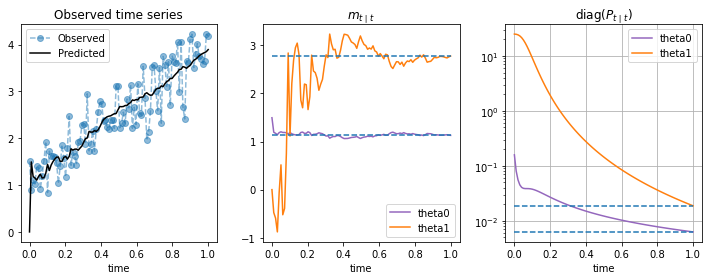

In [47]:
_, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].plot(time_stamp, y, '--o', alpha=.5);
ax[0].plot(time_stamp, observation_means, lw=1.5, color='k')
ax[0].set_title('Observed time series')
ax[0].legend(['Observed', 'Predicted'])
ax[0].set_xlabel('time');

color = ['C4', 'C1']
for i in range(2):
    ax[1].plot(time_stamp, tf.transpose(mt_filtered[..., i]), color=color[i]);
    ax[2].semilogy(time_stamp, tf.transpose(filtered_vars[..., i]), color=color[i]);
for i in range(2):
    ax[i+1].set_xlabel('time')
    ax[i+1].legend(['theta0', 'theta1'])
    
ax[1].hlines(m_t, time_stamp[0], time_stamp[-1], ls='--');
ax[1].set_title(r'$m_{t \mid t}$')
ax[2].hlines(tf.linalg.diag_part(p_t), time_stamp[0], time_stamp[-1], ls='--')
ax[2].set_title(r'diag($P_{t \mid t}$)')
ax[2].grid()
plt.tight_layout();

plt.savefig("../plots/linear_growth_lgssm.png");